<a href="https://colab.research.google.com/github/Rawab/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#Live Lecture Demo!

In [60]:
# Yesterday's Data
import pandas as pd
census_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_titles = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                 'martial-status', 'occupation', 'relationship', 'race', 'sex', 
                 'capital-gain', 'capital-loss', 'hours-per-week', 
                 'native-country', 'over50k']

census_data = pd.read_csv(census_url, header=None, na_values = ' ?', names = column_titles)

census_data_filled = census_data.copy()
for column in census_data:
  column_mode = census_data[column].mode()[0]
  census_data_filled[column].fillna(column_mode, inplace = True)

census_data_cleaned = census_data_filled.copy()
census_data_cleaned.over50k.replace(' <=50K', True, inplace = True)
census_data_cleaned.over50k.replace(' >50K', False, inplace = True)
census_data_cleaned.head()

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,over50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,True


In [88]:
import matplotlib.pyplot as plt
import numpy as np
census_data_cleaned['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

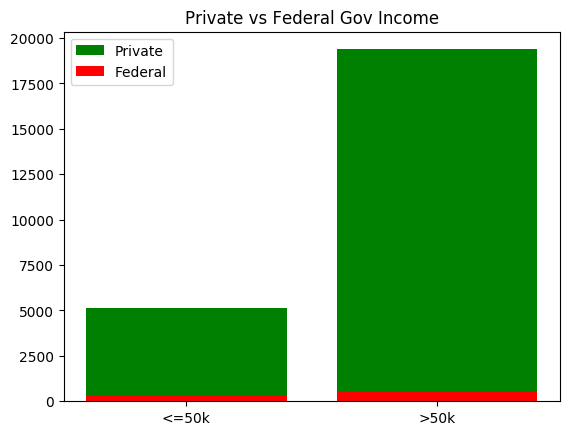

In [107]:
# Plot 1: workclass => over50k
# Bar Graph (Categorical => Ordinal)
plt.rcdefaults()

over50k_private, over50k_fed, private, fed = 0, 0, 0, 0
over50k_state, state = 0, 0
for i in range(len(census_data_cleaned['workclass'])):
  if census_data_cleaned['workclass'][i] == ' Private':
    private += 1
    if census_data_cleaned['over50k'][i] == True:
      over50k_private += 1
      
  elif census_data_cleaned['workclass'][i] == ' Federal-gov':
    fed += 1
    if census_data_cleaned['over50k'][i] == True:
      over50k_fed += 1
  elif census_data_cleaned['workclass'][i] == ' State-gov':
    state += 1
    if census_data_cleaned['over50k'][i] == True:
      over50k_state += 1


p1 = plt.bar(["<=50k", ">50k"], [private - over50k_private, over50k_private], color = 'green')
p2 = plt.bar(["<=50k", ">50k"], [fed - over50k_fed, over50k_fed], color = 'red')
#p3 = plt.bar(["<=50k", ">50k"], [state - over50k_state, over50k_state], color = 'blue')

plt.title('Private vs Federal Gov Income')
plt.legend((p1[0], p2[0]), ('Private', 'Federal'))

plt.show();

The stacked bar graph shows that federal employees are closer to evenly distributed between low and high income.
On the other hand, private employees are much more likely to earn high incomes.



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


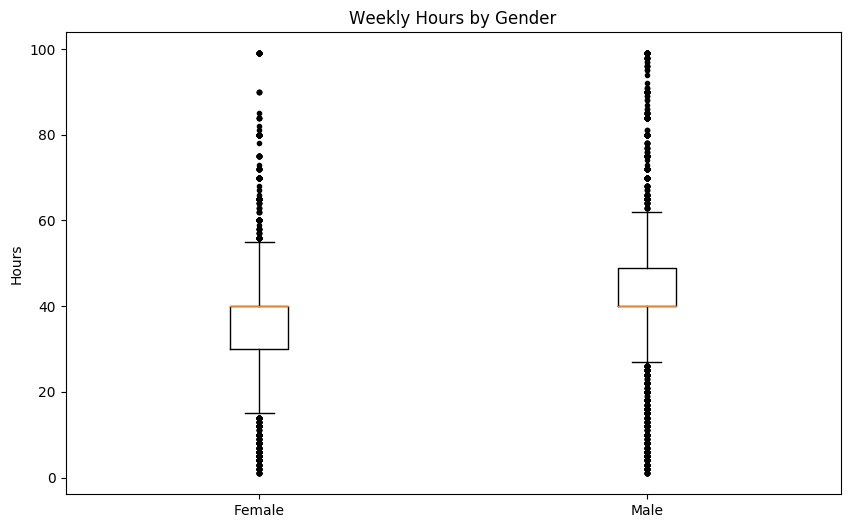

In [77]:
# Plot 2: sex => hours-per-week
# Boxplot (Categorical => Quantitative)
plt.rcdefaults()

grouped_data = census_data_cleaned['hours-per-week'].groupby(census_data_cleaned['sex'])
labels = ['Female', 'Male']

fig_bp, ax_bp = plt.subplots(figsize=(10, 6))
bp = plt.boxplot([group for gender, group in grouped_data], labels=labels,
                 sym='k.', showfliers=True);

ax_bp.set_title('Weekly Hours by Gender')
ax_bp.set_ylabel('Hours')

plt.show();

The boxplot tells us that men typically work longer hours than women. This is consistent with the traditional role of women as mothers who care for children. With that said, the discrepency is not as significant as would be expected worldwide.
The range (of significance) for women is wider. This may be due to younger adult women working as much as their male counterparts, along with older adult mothers minimizing work as much as possible.

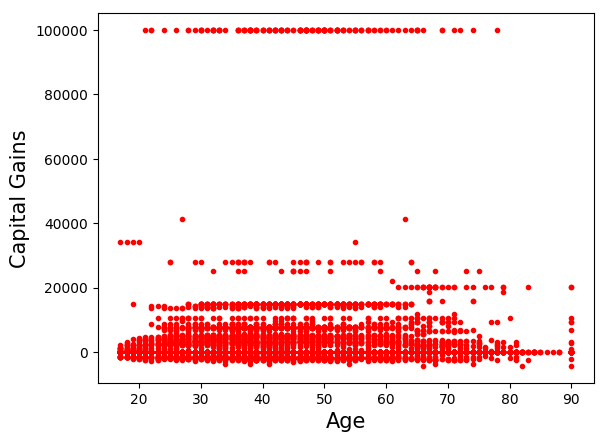

In [70]:
# Plot 3: age => capital-gain
# Scatterplot (Quantitative => Quantitative)
plt.rcdefaults()

fig_s, ax_s = plt.subplots()
ax_s.scatter(census_data_cleaned['age'], 
            census_data_cleaned['capital-gain'] - census_data_cleaned['capital-loss'],
            marker='.', color = 'red')
ax_s.set_xlabel('Age', fontsize=15)
ax_s.set_ylabel('Capital Gains', fontsize=15)
ax.set_title('Capital Gains by Age')
plt.show();

This scatterplot tells us that there is alot of variance in capital gains for all (adult) ages.
The data is skewed to the right, resulting in a greater mean (relative to median) value for capital gains.
This is to be expected as few people earn all of their income from capital gains, particularly those that make a significant amount.